In [154]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [157]:
class Grid:
    def __init__(self):
        self._matrix = None
        
    def __str__(self):
        return str(self._matrix)
    
    def at(self, i: int, j: int):
        return self._matrix[i, j]
    
    def shape(self):
        return self._matrix.shape if self._matrix is not None else None
    
    def as_matrix(self):
        return self._matrix
    
    def plot(self):
        custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['black', 'white'])
        sns.heatmap(self._matrix, cmap=custom_cmap)
        plt.show()

    def build(self, matrix: list[list]):
        self._matrix = np.matrix(matrix)
        return self

    def build_random(self, n_rows: int, n_cols: int, wall_proba: float = 0.1, random_state=0):
        """Only for tests. May not create a valid grid."""
        rand = np.random.RandomState(seed=random_state)
        self._matrix = np.matrix(
            rand.choice(
                (0, 1), size=(n_rows, n_cols), p=(wall_proba, 1 - wall_proba)
            )
        )
        self._matrix[0, 0] = 1
        self._matrix[n_rows - 1, n_cols - 1] = 1
        return self

    def is_valid_position(self, i: int, j: int) -> bool:
        is_wall = lambda i, j: not self._matrix[i, j]
        n_rows = self._matrix.shape[0]
        n_cols = self._matrix.shape[1]
        is_inside = (0 <= i < n_rows) and (0 <= j < n_cols)
        return is_inside and not is_wall(i, j) if is_inside else is_inside

In [158]:
class GreedySearch:       
    def __init__(self):
        self.position = []
        self.destiny = []
        self.path = None
        self.path_cost = 0
        self._moves = (
            np.array([-1, 0]), 
            np.array([1, 0]), 
            np.array([0, 1]), 
            np.array([0, -1])
        )
        
    def plot(self) -> None:
        if self.path is not None:
            custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['black', 'white'])
            sns.heatmap(self.path, cmap=custom_cmap)
            plt.show()
        return None
    
    def solve(self, grid: Grid, initial_position: np.ndarray[int, int], destiny: np.ndarray[int, int]) -> np.matrix:
        assert grid.is_valid_position(*initial_position) \
            and grid.is_valid_position(*destiny)

        self.position = np.array(initial_position)
        self.destiny = np.array(destiny)
        self.path = np.matrix(np.zeros(grid.shape(), dtype=float))
        self.path[*self.position] = True

        while not np.array_equal(self.position, destiny):
            best_cost = np.inf
            best_position = np.copy(self.position)
            for move in self._moves:
                position = self.position + move
                if grid.is_valid_position(*position) and not self.path[*position]:
                    cost = GreedySearch.position_cost(position, destiny)
                    if cost < best_cost:
                        best_cost = cost
                        best_position = position
            
            self.position = best_position
            self.path[*best_position] = True
            self.path_cost += 1

        self.path = np.where(self.path == 1, 1/2, grid.as_matrix())
        return self
        
    @staticmethod
    def position_cost(position: np.ndarray[int, int], destiny: np.ndarray[int, int]) -> float:
        return np.linalg.norm(np.array(position) - np.array(destiny))

In [159]:
grid = Grid().build([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
    [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
])

initial_position = np.array((0, 0))
destiny = np.array((grid.shape()[0] - 1, grid.shape()[1] - 1))

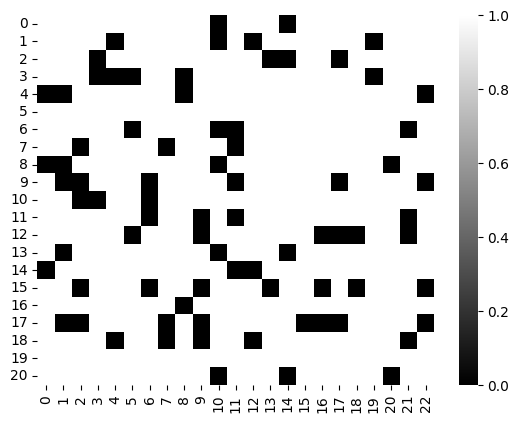

In [160]:
grid.plot()

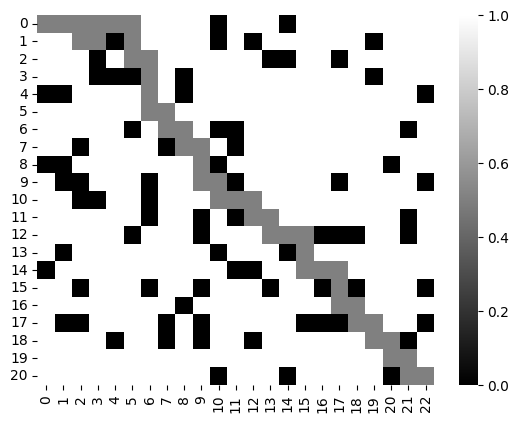

In [161]:
agent = GreedySearch().solve(grid, initial_position, destiny)
agent.plot()